
# Data Analysis and Model Building with PySpark

In this notebook, we analyze and preprocess data for a machine learning model using PySpark.
The workflow includes:

1. Setting up the environment and importing required libraries.
2. Initializing Spark session.
3. Data loading and inspection.
4. Data preprocessing, including feature engineering.
5. Model building and evaluation.

Let's start by importing the required libraries and setting up the environment.


### Importing Libraries

In [2]:

# Install PySpark version 3.2 to ensure compatibility
!pip install pyspark==3.2

# Import libraries for data handling, Spark, and visualization
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, col
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 MB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.8/198.8 kB 15.5 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805891 sha256=8757ebb2fa4104fcc9d28132da73f10f4e7a35348a0fe6ebf977d097ce16979f
  Stored in directory: /root/.cache/pip/wheels/32/97/d3/8b6d964c8700e4fbb561c71638a92ec55dac9be51eb5fea86d
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.5.3
    Uninstalling pyspark-3.5.3:
      Successfully uninstalled pyspark-3.5.3



### Initializing Spark Session

To utilize PySpark's capabilities, we start by creating a Spark session.



# Initialize Spark session for data processing
spark = SparkSession.builder.appName("DataAnalysisPartA").getOrCreate()


In [3]:
spark = SparkSession.builder.appName("CrimeDataAnalysis").getOrCreate()

Data Loading and Preprocessing :

In [4]:
# Load data for each month and county
# January
jan_derbyshire = spark.read.csv('/content/2022-01-derbyshire-street.csv', header=True, inferSchema=True)
jan_kent = spark.read.csv('/content/2022-01-kent-street.csv', header=True, inferSchema=True)
jan_leicestershire = spark.read.csv('/content/2022-01-leicestershire-street.csv', header=True, inferSchema=True)
jan_data = jan_derbyshire.union(jan_kent).union(jan_leicestershire)

# February
feb_derbyshire = spark.read.csv('/content/2022-02-derbyshire-street.csv', header=True, inferSchema=True)
feb_kent = spark.read.csv('/content/2022-02-kent-street.csv', header=True, inferSchema=True)
feb_leicestershire = spark.read.csv('/content/2022-02-leicestershire-street.csv', header=True, inferSchema=True)
feb_data = feb_derbyshire.union(feb_kent).union(feb_leicestershire)

# March
mar_derbyshire = spark.read.csv('/content/2022-03-derbyshire-street.csv', header=True, inferSchema=True)
mar_kent = spark.read.csv('/content/2022-03-kent-street.csv', header=True, inferSchema=True)
mar_leicestershire = spark.read.csv('/content/2022-03-leicestershire-street.csv', header=True, inferSchema=True)
mar_data = mar_derbyshire.union(mar_kent).union(mar_leicestershire)

# April
apr_derbyshire = spark.read.csv('/content/2022-04-derbyshire-street.csv', header=True, inferSchema=True)
apr_kent = spark.read.csv('/content/2022-04-kent-street.csv', header=True, inferSchema=True)
apr_leicestershire = spark.read.csv('/content/2022-04-leicestershire-street.csv', header=True, inferSchema=True)
apr_data = apr_derbyshire.union(apr_kent).union(apr_leicestershire)

# May
may_derbyshire = spark.read.csv('/content/2022-05-derbyshire-street.csv', header=True, inferSchema=True)
may_kent = spark.read.csv('/content/2022-05-kent-street.csv', header=True, inferSchema=True)
may_leicestershire = spark.read.csv('/content/2022-05-leicestershire-street.csv', header=True, inferSchema=True)
may_data = may_derbyshire.union(may_kent).union(may_leicestershire)

# June
jun_derbyshire = spark.read.csv('/content/2022-06-derbyshire-street.csv', header=True, inferSchema=True)
jun_kent = spark.read.csv('/content/2022-06-kent-street.csv', header=True, inferSchema=True)
jun_leicestershire = spark.read.csv('/content/2022-06-leicestershire-street.csv', header=True, inferSchema=True)
jun_data = jun_derbyshire.union(jun_kent).union(jun_leicestershire)

# July
jul_derbyshire = spark.read.csv('/content/2022-07-derbyshire-street.csv', header=True, inferSchema=True)
jul_kent = spark.read.csv('/content/2022-07-kent-street.csv', header=True, inferSchema=True)
jul_leicestershire = spark.read.csv('/content/2022-07-leicestershire-street.csv', header=True, inferSchema=True)
jul_data = jul_derbyshire.union(jul_kent).union(jul_leicestershire)

# August
aug_derbyshire = spark.read.csv('/content/2022-08-derbyshire-street.csv', header=True, inferSchema=True)
aug_kent = spark.read.csv('/content/2022-08-kent-street.csv', header=True, inferSchema=True)
aug_leicestershire = spark.read.csv('/content/2022-08-leicestershire-street.csv', header=True, inferSchema=True)
aug_data = aug_derbyshire.union(aug_kent).union(aug_leicestershire)

# September
sep_derbyshire = spark.read.csv('/content/2022-09-derbyshire-street.csv', header=True, inferSchema=True)
sep_kent = spark.read.csv('/content/2022-09-kent-street.csv', header=True, inferSchema=True)
sep_leicestershire = spark.read.csv('/content/2022-09-leicestershire-street.csv', header=True, inferSchema=True)
sep_data = sep_derbyshire.union(sep_kent).union(sep_leicestershire)

# October
oct_derbyshire = spark.read.csv('/content/2022-10-derbyshire-street.csv', header=True, inferSchema=True)
oct_kent = spark.read.csv('/content/2022-10-kent-street.csv', header=True, inferSchema=True)
oct_leicestershire = spark.read.csv('/content/2022-10-leicestershire-street.csv', header=True, inferSchema=True)
oct_data = oct_derbyshire.union(oct_kent).union(oct_leicestershire)

# November
nov_derbyshire = spark.read.csv('/content/2022-11-derbyshire-street.csv', header=True, inferSchema=True)
nov_kent = spark.read.csv('/content/2022-11-kent-street.csv', header=True, inferSchema=True)
nov_leicestershire = spark.read.csv('/content/2022-11-leicestershire-street.csv', header=True, inferSchema=True)
nov_data = nov_derbyshire.union(nov_kent).union(nov_leicestershire)

# December
dec_derbyshire = spark.read.csv('/content/2022-12-derbyshire-street.csv', header=True, inferSchema=True)
dec_kent = spark.read.csv('/content/2022-12-kent-street.csv', header=True, inferSchema=True)
dec_leicestershire = spark.read.csv('/content/2022-12-leicestershire-street.csv', header=True, inferSchema=True)
dec_data = dec_derbyshire.union(dec_kent).union(dec_leicestershire)

# Combine all months data into a single DataFrame
crime_data = (jan_data.union(feb_data)
              .union(mar_data)
              .union(apr_data)
              .union(may_data)
              .union(jun_data)
              .union(jul_data)
              .union(aug_data)
              .union(sep_data)
              .union(oct_data)
              .union(nov_data)
              .union(dec_data))


Descriptive Data Analysis :

In [5]:
# Standardize county names
crime_data = crime_data.withColumn("County",
    when(col("Reported by") == "Derbyshire Constabulary", "Derbyshire")
    .when(col("Reported by") == "Kent Police", "Kent")
    .when(col("Reported by") == "Leicestershire Police", "Leicestershire"))
crime_data.printSchema()

root
 |-- Crime ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Reported by: string (nullable = true)
 |-- Falls within: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LSOA code: string (nullable = true)
 |-- LSOA name: string (nullable = true)
 |-- Crime type: string (nullable = true)
 |-- Last outcome category: string (nullable = true)
 |-- Context: string (nullable = true)
 |-- County: string (nullable = true)



In [6]:
# 1-Total Crimes by County:

# Register DataFrame as SQL temporary view
crime_data.createOrReplaceTempView("crime_data")

# Query total crimes by county
total_crimes_by_county = spark.sql("""
    SELECT County, COUNT(*) as Total_Crimes
    FROM crime_data
    GROUP BY County
""")
total_crimes_by_county.show()

+--------------+------------+
|        County|Total_Crimes|
+--------------+------------+
|    Derbyshire|      110805|
|          Kent|      200945|
|Leicestershire|      115179|
+--------------+------------+



In [7]:
# 2-Monthly Crime Trends:

monthly_crime_trends = spark.sql("""
    SELECT County, Month, COUNT(*) as Total_Crimes
    FROM crime_data
    GROUP BY County, Month
    ORDER BY County, Month
""")
monthly_crime_trends.show(30)


+--------------+-------+------------+
|        County|  Month|Total_Crimes|
+--------------+-------+------------+
|    Derbyshire|2022-01|        8991|
|    Derbyshire|2022-02|        8452|
|    Derbyshire|2022-03|        9598|
|    Derbyshire|2022-04|        9409|
|    Derbyshire|2022-05|       10140|
|    Derbyshire|2022-06|        9710|
|    Derbyshire|2022-07|       10017|
|    Derbyshire|2022-08|        9571|
|    Derbyshire|2022-09|        8781|
|    Derbyshire|2022-10|        9205|
|    Derbyshire|2022-11|        8923|
|    Derbyshire|2022-12|        8008|
|          Kent|2022-01|       16338|
|          Kent|2022-02|       15383|
|          Kent|2022-03|       17310|
|          Kent|2022-04|       17144|
|          Kent|2022-05|       17546|
|          Kent|2022-06|       17388|
|          Kent|2022-07|       17950|
|          Kent|2022-08|       18365|
|          Kent|2022-09|       16574|
|          Kent|2022-10|       16172|
|          Kent|2022-11|       15799|
|          K

In [ ]:
# 3- Crime Type Analysis:
# Query for crime type analysis by county
crime_type_analysis = spark.sql("""
    SELECT County, `Crime type` AS Crime_Type, COUNT(*) as Count
    FROM crime_data
    GROUP BY County, `Crime type`
    ORDER BY County, Count DESC
""")
crime_type_analysis.show()


+----------+--------------------+-----+
|    County|          Crime_Type|Count|
+----------+--------------------+-----+
|Derbyshire|Violence and sexu...|41878|
|Derbyshire|Anti-social behav...|23038|
|Derbyshire|        Public order|10198|
|Derbyshire|Criminal damage a...| 8724|
|Derbyshire|         Other theft| 6821|
|Derbyshire|       Vehicle crime| 4669|
|Derbyshire|         Shoplifting| 4237|
|Derbyshire|            Burglary| 3806|
|Derbyshire|               Drugs| 2292|
|Derbyshire|         Other crime| 2053|
|Derbyshire|Possession of wea...|  949|
|Derbyshire|             Robbery|  769|
|Derbyshire|Theft from the pe...|  767|
|Derbyshire|       Bicycle theft|  604|
|      Kent|Violence and sexu...|83341|
|      Kent|Anti-social behav...|27904|
|      Kent|Criminal damage a...|19936|
|      Kent|         Other theft|14318|
|      Kent|        Public order|12332|
|      Kent|         Shoplifting|11941|
+----------+--------------------+-----+
only showing top 20 rows



Now we move to Data Visualization:

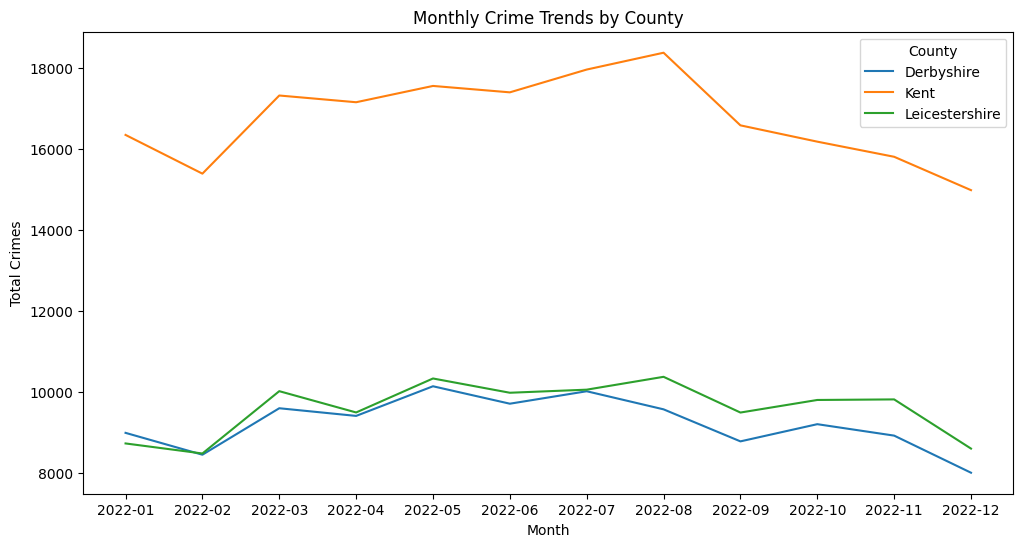

In [ ]:
# Convert to Pandas DataFrame for visualization
monthly_trends_pd = monthly_crime_trends.toPandas()

# Line plot for monthly crime trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trends_pd, x='Month', y='Total_Crimes', hue='County')
plt.title("Monthly Crime Trends by County")
plt.xlabel("Month")
plt.ylabel("Total Crimes")
plt.show()

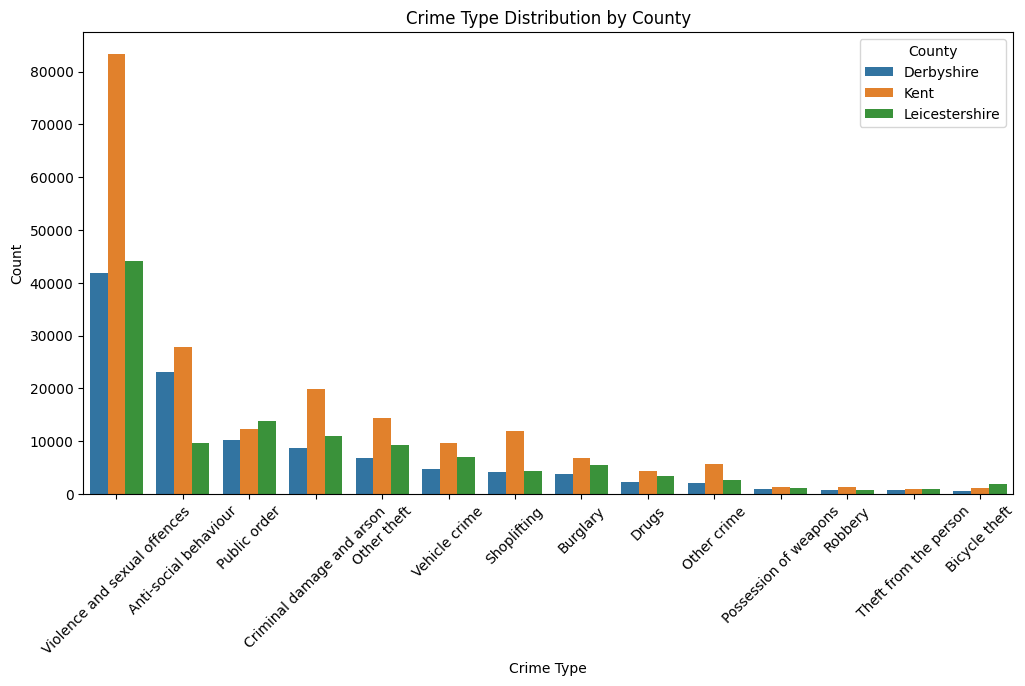

In [ ]:
# Convert to Pandas DataFrame
crime_type_pd = crime_type_analysis.toPandas()

# Bar chart for crime type distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=crime_type_pd, x='Crime_Type', y='Count', hue='County')
plt.title("Crime Type Distribution by County")
plt.xlabel("Crime Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

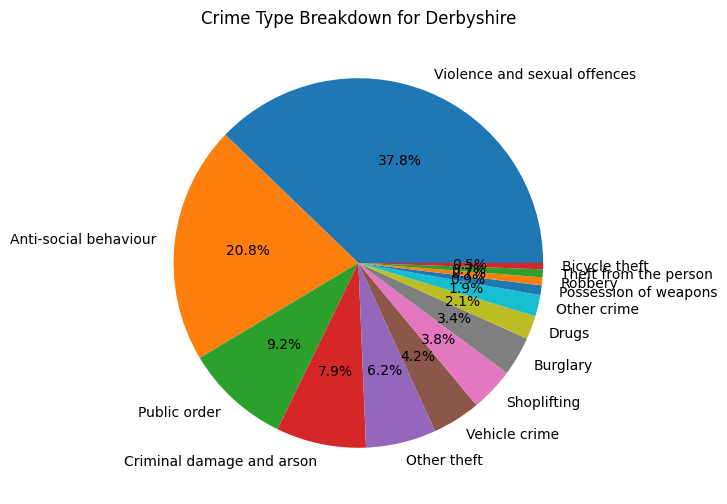

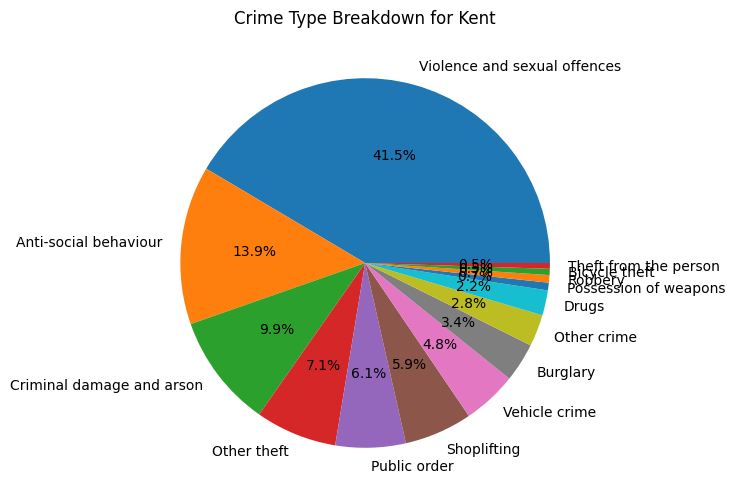

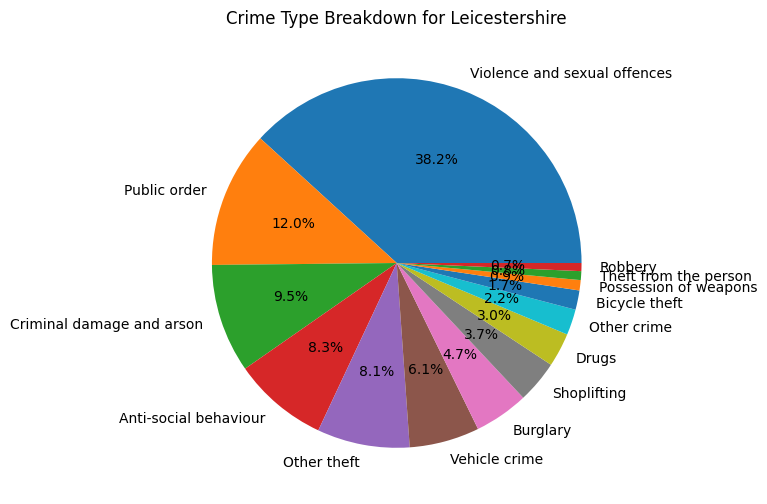

In [ ]:
# Separate data for each county
for county in crime_type_pd['County'].unique():
    county_data = crime_type_pd[crime_type_pd['County'] == county]
    plt.figure(figsize=(6, 6))
    plt.pie(county_data['Count'], labels=county_data['Crime_Type'], autopct='%1.1f%%')
    plt.title(f"Crime Type Breakdown for {county}")
    plt.show()
